In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ShuffleSplit

In [2]:
data_df = pd.read_csv('game_data/preprocessing_data.csv')

In [3]:
data_df.head()

,CUST_SEX,CUST_AGE,BUYERPART,CAR_AGE,CAR_PRICE,IS_LOAN,LOAN_PERIED,LOAN_AMOUNT,F_INSORNOT,ALL_BUYINS_N,...,CAR_MODEL_车型2,CAR_MODEL_车型3,CAR_MODEL_车型4,CAR_MODEL_车型5,CAR_MODEL_车型6,CAR_MODEL_车型7,CAR_MODEL_车型8,CAR_MODEL_车型9,CAR_MODEL_nan,IS_LOST
0,1,42.0,1,44.102154,433.358974,1,5.0,344.760787,1.0,1.0,...,0,0,0,0,1,0,0,0,0,0
1,2,47.0,1,24.919872,299.666481,0,0.0,0.000000,1.0,1.0,...,0,0,0,0,0,1,0,0,0,0
2,1,44.0,1,18.275667,360.277671,1,4.0,223.606798,1.0,1.0,...,1,0,0,0,0,0,0,0,0,0
3,1,36.0,1,49.436828,479.374593,0,0.0,0.000000,0.0,4.0,...,0,0,0,0,1,0,0,0,0,0
4,1,66.0,1,40.360872,489.693782,1,5.0,408.656335,1.0,2.0,...,0,0,0,0,1,0,0,0,0,1


In [4]:
result = data_df
x = result.drop('IS_LOST',axis=1)
y = result['IS_LOST']

In [5]:
from sklearn.model_selection import train_test_split
#训练集与测试集的切分
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state = 0)
stdsc = StandardScaler()
x_train_std = stdsc.fit_transform(x_train)
x_test_std = stdsc.fit_transform(x_test)
cv = ShuffleSplit(n_splits = 20,test_size=0.3)

# 随机森林

In [6]:
%%time
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.model_selection import GridSearchCV
rf_model = RandomForestClassifier()

rf_param = {'n_estimators':range(90,100)}
rf_grid = GridSearchCV(rf_model,rf_param,cv = cv)
rf_grid.fit(x_train_std,y_train)
print('Parameter with best score:')
print(rf_grid.best_params_)
print('Cross validation score :',rf_grid.best_score_)

Parameter with best score:
{'n_estimators': 92}
Cross validation score : 0.8408240027991601
CPU times: user 14min 45s, sys: 28.3 s, total: 15min 13s
Wall time: 11min 26s


In [7]:
best_rf = rf_grid.best_estimator_
print('Test score : ' , best_rf.score(x_test_std,y_test))

Test score :  0.5256551555228999


## 评价指标

In [8]:
%%time
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=94)
rf_model.fit(x_train_std,y_train)
result_prediction = rf_model.predict(x_test)

CPU times: user 5.59 s, sys: 156 ms, total: 5.74 s
Wall time: 4.92 s


In [9]:
from sklearn.metrics import recall_score

score = recall_score(y_test,result_prediction)
print(score) # 得到预测结果区间[0,1]

0.9932115527030363


## 交叉验证

In [10]:
%%time
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=94)
kfold = KFold(n_splits=10,random_state=0)
# x 为所有数据中用来预测的特征；y为所有数据中需要预测的结果列
cv_cross = cross_val_score(rf_model,x_train_std,y_train,cv=kfold,scoring="accuracy")
print(cv_cross.mean()) # 交叉验证均值
print(cv_cross.std()) # 交叉验证标准差

0.8447227496589166
0.007074598937369016
CPU times: user 43.7 s, sys: 472 ms, total: 44.2 s
Wall time: 43.8 s


In [11]:
#feature importance scores
features = x.columns
feature_importances = best_rf.feature_importances_

features_df = pd.DataFrame({'Features':features,'Importance':feature_importances})
features_df.sort_values('Importance',inplace=True,ascending=False)

In [12]:
features_df

,Features,Importance
3,CAR_AGE,0.227479
9,ALL_BUYINS_N,0.124362
1,CUST_AGE,0.095376
11,GLASSBUYSEPARATE_CNT,0.091160
13,ONCE_PAY,0.090246
7,LOAN_AMOUNT,0.083548
4,CAR_PRICE,0.063893
6,LOAN_PERIED,0.055606
8,F_INSORNOT,0.054884
10,DLRSI_CNT,0.032887


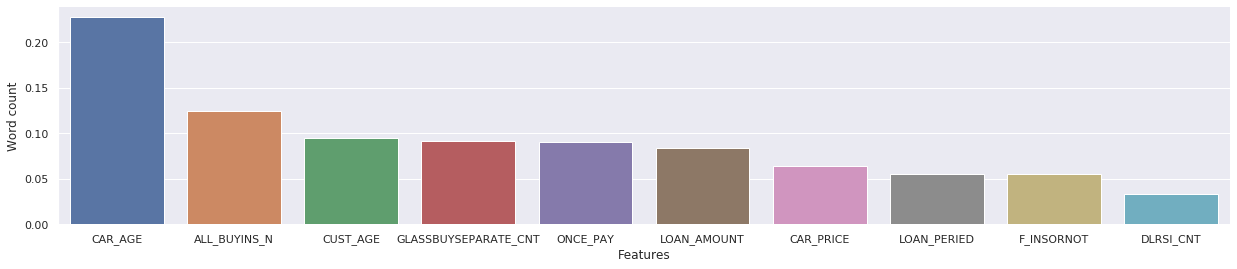

In [17]:
sns.set(rc={"figure.figsize": (21, 4)})
sns.barplot(features_df['Features'][:10], features_df['Importance'][:10],)
plt.ylabel('Word count')
# 数据可视化：柱状图
sns.despine(bottom=True)
plt.show()